# MultiVariable MADALINE Code

## Load Modules

In [35]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

## MADALINE Code

In [36]:
def majority_vote(z):
    """Compute the majority vote of the hidden layer outputs."""
    return 1 if np.sum(z) >= 0 else -1

def aktivasi(x):
    """Step function to determine the binary output (-1 or 1)."""
    return 1 if x >= 0 else -1

def train_madaline(train_data, train_target, input_neuron: int, hidden_neuron: int, alpha: float, max_epoch: int, verbose: bool=False):
    train_data = np.array(train_data)
    train_target = np.array(train_target)
    w = np.random.random((input_neuron, hidden_neuron))  # Initialize weights for ADALINE units
    b = np.random.random(hidden_neuron)       # Bias for hidden layer ADALINE units
    b = np.append(b, 0.5)                     # Bias for the output unit
    v = np.array([1] * hidden_neuron)         # Initialize output layer weights (all 1 for Madaline)
    epoch = 0
    weight_updated = True

    v_aktivasi = np.vectorize(aktivasi)

    while weight_updated and epoch < max_epoch:
        weight_updated = False
        for data, target in zip(train_data, train_target):
            # Calculate hidden layer outputs (z_in and z)
            z_in = np.dot(data, w) + b[:-1]
            z = v_aktivasi(z_in)  # Activation function on hidden layer outputs

            # Majority vote for output layer
            y = majority_vote(z)

            # If the majority vote output doesn't match the target, apply MR1
            if y != target:
                weight_updated = True
                # We need to flip some of the ADALINE units to correct the error
                if target == 1:
                    # Flip the minimum number of units from -1 to 1 (i.e., from negative to positive)
                    flip_candidates = np.where(z == -1)[0]
                else:
                    # Flip the minimum number of units from +1 to -1 (i.e., from positive to negative)
                    flip_candidates = np.where(z == 1)[0]

                # Select the units closest to flipping (minimal disturbance principle)
                min_indices = np.argsort(np.abs(z_in[flip_candidates]))  # Sort by how close to flipping
                num_to_flip = int(np.ceil(len(flip_candidates) / 2))  # Determine how many to flip (minimal number to flip majority)

                for i in range(num_to_flip):
                    selected_unit = flip_candidates[min_indices[i]]

                    if target == 1:
                        # Make the selected unit flip from -1 to 1
                        b[selected_unit] = b[selected_unit] + alpha * (1 - z_in[selected_unit])
                        w[:, selected_unit] = w[:, selected_unit] + alpha * (1 - z_in[selected_unit]) * data
                    elif target == -1:
                        # Make the selected unit flip from 1 to -1
                        b[selected_unit] = b[selected_unit] + alpha * (-1 - z_in[selected_unit])
                        w[:, selected_unit] = w[:, selected_unit] + alpha * (-1 - z_in[selected_unit]) * data

        if verbose:
          print("Weights after epoch", epoch + 1, ":", w)
          print("Biases after epoch", epoch + 1, ":", b)

        epoch += 1

    return w, v, b


In [37]:
def test(w,v,b,test_data):
  v_aktivasi = np.vectorize(aktivasi)
  z_in = np.dot(test_data, w)
  z_in = z_in + b[:-1]
  z = v_aktivasi(z_in)
  y_in = np.dot(z, v) + b[-1]
  y = v_aktivasi(y_in)
  return y

In [38]:
from sklearn.metrics import accuracy_score
data = np.array([[1,1],[1,-1],[-1,1],[-1,-1]])
target = np.array([-1, 1, 1,-1])
(w,v,b) = train_madaline(data,target,input_neuron=2, hidden_neuron=2, alpha=0.25, max_epoch=10, verbose=True)
output = test(w,v,b,data)
accuracy = accuracy_score(output, target)

print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)

Weights after epoch 1 : [[0.78311343 0.02556099]
 [0.86933179 0.31503566]]
Biases after epoch 1 : [ 0.93124343 -0.33010988  0.5       ]
Weights after epoch 2 : [[ 0.78311343 -0.2270607 ]
 [ 0.86933179  0.06241397]]
Biases after epoch 2 : [ 0.93124343 -0.58273157  0.5       ]
Weights after epoch 3 : [[ 0.29530458 -0.2270607 ]
 [ 0.42666672  0.06241397]]
Biases after epoch 3 : [ 0.1526565  -0.58273157  0.5       ]
Weights after epoch 4 : [[ 0.50378398 -0.55037493]
 [-0.08853518  0.38572819]]
Biases after epoch 4 : [-0.2694555  -0.25941735  0.5       ]
Weights after epoch 5 : [[ 0.21733565 -0.55037493]
 [-0.3749835   0.38572819]]
Biases after epoch 5 : [-0.55590383 -0.25941735  0.5       ]
Weights after epoch 6 : [[ 0.21733565 -0.55037493]
 [-0.3749835   0.38572819]]
Biases after epoch 6 : [-0.55590383 -0.25941735  0.5       ]
Output: [-1  1  1 -1]
Target: [-1  1  1 -1]
Accuracy: 1.0


# MADALINE Multi Variable (Breast Cancer Dataset)

## Load dataset Breast Cancer

In [39]:
from sklearn.datasets import load_breast_cancer
X_cancer, y_cancer = load_breast_cancer(return_X_y=True)

# Mengubah label 0 menjadi -1
y_cancer = np.where(y_cancer == 0, -1, 1)

In [40]:
from sklearn.model_selection import train_test_split
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42, stratify=y_cancer)

## Preprocessing

Standarisasi data menggunakan StandardScaler

In [41]:
from sklearn.preprocessing import StandardScaler
std_cancer = StandardScaler()
X_train_cancer = std_cancer.fit_transform(X_train_cancer)
X_test_cancer = std_cancer.transform(X_test_cancer)

X_train_cancer

array([[-1.07200079, -0.6584246 , -1.0880801 , ..., -1.35052668,
        -0.35265805, -0.54138003],
       [ 1.74874285,  0.06650173,  1.75115682, ...,  1.54991557,
         0.19107787, -0.1737386 ],
       [-0.97473376, -0.93112416, -0.99770871, ..., -1.70744192,
        -0.307734  , -1.21303263],
       ...,
       [ 0.39844772,  1.06867262,  0.50751384, ...,  1.53492543,
         0.16164487,  1.23754763],
       [ 0.85331409, -0.0380331 ,  0.9054796 , ...,  2.10455077,
         0.31035897,  0.36249578],
       [-0.91179628, -0.82431683, -0.87666079, ..., -0.51332734,
        -0.50756857,  1.30824791]])

## Pemodelan Data

In [42]:
hidden_neuron =  [5, 10, 15]
alpha = [0.05, 0.1, 0.5]
max_epoch = [100, 500, 1000]

acc = 0
best_params = {}

for h in hidden_neuron:
    for a in alpha:
        for e in max_epoch:
            w, v, b = train_madaline(X_train_cancer, y_train_cancer, input_neuron=len(X_train_cancer[0]), hidden_neuron=h, alpha=a, max_epoch=e)
            y_pred = test(w, v, b, X_test_cancer)
            current_acc = accuracy_score(y_test_cancer, y_pred)
            
            if acc < current_acc:
                acc = current_acc
                best_params['hidden_neuron'] = h
                best_params['alpha'] = a
                best_params['max_epoch'] = e
                best_params['accuracy'] = acc
                
                
            
print(best_params)

(w, v, b) = train_madaline(X_train_cancer, y_test_cancer,input_neuron=len(X_train_cancer[0]), hidden_neuron=best_params['hidden_neuron'], alpha=best_params['alpha'], max_epoch=best_params['max_epoch'])

C:\Users\indra\AppData\Local\Temp\ipykernel_17656\1736094767.py:25: RuntimeWarning: overflow encountered in add
  z_in = np.dot(data, w) + b[:-1]
C:\Users\indra\AppData\Local\Temp\ipykernel_17656\1736094767.py:52: RuntimeWarning: overflow encountered in multiply
  w[:, selected_unit] = w[:, selected_unit] + alpha * (1 - z_in[selected_unit]) * data
c:\Users\indra\miniconda3\Lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in aktivasi (vectorized)
  outputs = ufunc(*inputs)
C:\Users\indra\AppData\Local\Temp\ipykernel_17656\1736094767.py:52: RuntimeWarning: invalid value encountered in add
  w[:, selected_unit] = w[:, selected_unit] + alpha * (1 - z_in[selected_unit]) * data
C:\Users\indra\AppData\Local\Temp\ipykernel_17656\1736094767.py:25: RuntimeWarning: invalid value encountered in add
  z_in = np.dot(data, w) + b[:-1]
C:\Users\indra\AppData\Local\Temp\ipykernel_17656\1736094767.py:56: RuntimeWarning: overflow encountered in multiply
  w[:, 

{'hidden_neuron': 5, 'alpha': 0.05, 'max_epoch': 100, 'accuracy': 0.9824561403508771}


#### best params

{'hidden_neuron': 5, 'alpha': 0.05, 'max_epoch': 100, 'accuracy': 0.9824561403508771}

## Pengujian

In [61]:
output_cancer = test(w,v,b, X_test_cancer)
print(classification_report(output_cancer, y_test_cancer, zero_division=0))

              precision    recall  f1-score   support

          -1       0.62      0.63      0.63        41
           1       0.79      0.78      0.79        73

    accuracy                           0.73       114
   macro avg       0.71      0.71      0.71       114
weighted avg       0.73      0.73      0.73       114



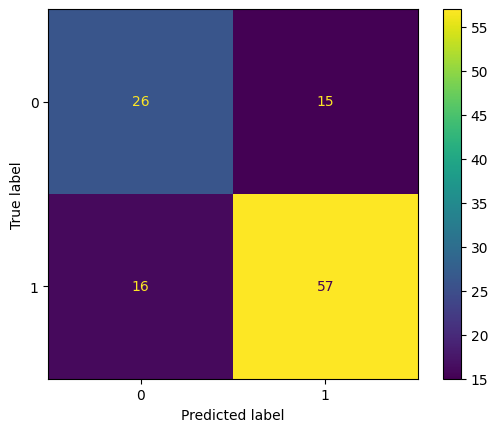

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(output_cancer, y_test_cancer)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
display.plot()

# MADALINE Multi Variable & Multi Kelas (Wine Dataset)

## Load Dataset Wine

In [45]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
X_wine, y_wine = load_wine(return_X_y=True)

X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42, stratify=y_wine)


## Preprocessing

In [46]:
from sklearn.preprocessing import StandardScaler
std_wine = StandardScaler()
X_train_wine = std_wine.fit_transform(X_train_wine)
X_test_wine = std_wine.transform(X_test_wine)

In [47]:
data_latih = pd.DataFrame(X_train_wine)
data_latih['target'] = y_train_wine

## Membuat One-vs-Rest Code

Metode one-vs-rest memerlukan tiga jenis data latih yang diperlukan untuk melatih
tiga MADALINE yang berbeda pada dataset Wine. Fungsi buat_trainingset digunakan untuk
membentuk tiga dataset tersebut.

In [48]:
def membuat_trainingset(dataset):
  trainingset = {}
  kolom_kelas = dataset.columns[-1]
  list_kelas = dataset[kolom_kelas].unique()
  for kelas in list_kelas:
    data_temp = dataset.copy(deep=True)
    data_temp[kolom_kelas] = data_temp[kolom_kelas].map({kelas:1})
    data_temp[kolom_kelas] = data_temp[kolom_kelas].fillna(-1)
    trainingset[kelas]=data_temp
  return trainingset


In [49]:
trainingset = membuat_trainingset(data_latih)

In [50]:
trainingset.keys()

dict_keys([0, 2, 1])

In [51]:
# Training set kelas 0
trainingset[0]

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,0.385801,-0.637871,1.776668,-1.224532,0.696430,0.526865,0.732292,-0.169549,-0.415783,-0.167467,0.624378,0.252908,0.467725,1.0
1,0.948519,-0.765445,1.253174,0.853284,0.091785,1.172795,1.333181,-0.590457,1.349742,0.305303,1.067155,0.151048,1.815768,1.0
2,0.523354,-0.519409,0.954034,-1.046433,-0.445678,0.930572,1.006382,-0.169549,-0.260002,-0.081509,-0.128343,0.893172,1.516203,1.0
3,0.973529,-0.555859,0.168793,-1.076116,-0.714409,0.526865,0.816627,-0.590457,0.363125,0.262324,0.890044,0.427526,1.932265,1.0
4,0.435820,0.820120,0.056615,0.556453,-0.512860,-0.555068,-1.291756,0.756449,-0.606183,1.474335,-1.766619,-1.435059,-0.297831,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,0.685917,0.756333,1.327959,1.150115,-0.176946,-1.168702,-1.544762,1.177357,-1.817818,-0.274915,-0.261176,-0.794796,-0.730536,-1.0
138,-1.652489,-0.610534,0.954034,1.892192,-0.781592,-0.571216,-0.395693,0.335541,-0.450402,-1.027050,1.819877,0.878620,-0.590739,-1.0
139,0.673412,-0.492072,1.066212,-0.185624,0.696430,0.123159,0.574163,-0.590457,-0.104220,-0.339384,0.668656,0.383871,1.183353,1.0
140,-0.014354,1.011481,-0.055562,-0.334039,0.427699,-1.427074,-1.355008,0.335541,-1.142765,0.124791,-1.191008,-1.245891,-0.214618,-1.0


In [52]:
# Training set kelas 1
trainingset[1]

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,0.385801,-0.637871,1.776668,-1.224532,0.696430,0.526865,0.732292,-0.169549,-0.415783,-0.167467,0.624378,0.252908,0.467725,-1.0
1,0.948519,-0.765445,1.253174,0.853284,0.091785,1.172795,1.333181,-0.590457,1.349742,0.305303,1.067155,0.151048,1.815768,-1.0
2,0.523354,-0.519409,0.954034,-1.046433,-0.445678,0.930572,1.006382,-0.169549,-0.260002,-0.081509,-0.128343,0.893172,1.516203,-1.0
3,0.973529,-0.555859,0.168793,-1.076116,-0.714409,0.526865,0.816627,-0.590457,0.363125,0.262324,0.890044,0.427526,1.932265,-1.0
4,0.435820,0.820120,0.056615,0.556453,-0.512860,-0.555068,-1.291756,0.756449,-0.606183,1.474335,-1.766619,-1.435059,-0.297831,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,0.685917,0.756333,1.327959,1.150115,-0.176946,-1.168702,-1.544762,1.177357,-1.817818,-0.274915,-0.261176,-0.794796,-0.730536,-1.0
138,-1.652489,-0.610534,0.954034,1.892192,-0.781592,-0.571216,-0.395693,0.335541,-0.450402,-1.027050,1.819877,0.878620,-0.590739,1.0
139,0.673412,-0.492072,1.066212,-0.185624,0.696430,0.123159,0.574163,-0.590457,-0.104220,-0.339384,0.668656,0.383871,1.183353,-1.0
140,-0.014354,1.011481,-0.055562,-0.334039,0.427699,-1.427074,-1.355008,0.335541,-1.142765,0.124791,-1.191008,-1.245891,-0.214618,-1.0


In [53]:
# Training set kelas 2
trainingset[2]

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,0.385801,-0.637871,1.776668,-1.224532,0.696430,0.526865,0.732292,-0.169549,-0.415783,-0.167467,0.624378,0.252908,0.467725,-1.0
1,0.948519,-0.765445,1.253174,0.853284,0.091785,1.172795,1.333181,-0.590457,1.349742,0.305303,1.067155,0.151048,1.815768,-1.0
2,0.523354,-0.519409,0.954034,-1.046433,-0.445678,0.930572,1.006382,-0.169549,-0.260002,-0.081509,-0.128343,0.893172,1.516203,-1.0
3,0.973529,-0.555859,0.168793,-1.076116,-0.714409,0.526865,0.816627,-0.590457,0.363125,0.262324,0.890044,0.427526,1.932265,-1.0
4,0.435820,0.820120,0.056615,0.556453,-0.512860,-0.555068,-1.291756,0.756449,-0.606183,1.474335,-1.766619,-1.435059,-0.297831,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,0.685917,0.756333,1.327959,1.150115,-0.176946,-1.168702,-1.544762,1.177357,-1.817818,-0.274915,-0.261176,-0.794796,-0.730536,1.0
138,-1.652489,-0.610534,0.954034,1.892192,-0.781592,-0.571216,-0.395693,0.335541,-0.450402,-1.027050,1.819877,0.878620,-0.590739,-1.0
139,0.673412,-0.492072,1.066212,-0.185624,0.696430,0.123159,0.574163,-0.590457,-0.104220,-0.339384,0.668656,0.383871,1.183353,-1.0
140,-0.014354,1.011481,-0.055562,-0.334039,0.427699,-1.427074,-1.355008,0.335541,-1.142765,0.124791,-1.191008,-1.245891,-0.214618,1.0


## Pemodelan Data

In [63]:
def training(trainingset, input_neuron=13, hidden_neuron=6, alpha=0.5, max_epoch=1000, verbose=False):
    list_kelas = trainingset.keys()
    weights = {}

    for kelas in list_kelas:
        trainset = trainingset[kelas].iloc[:, :-1].values
        trainlabel = trainingset[kelas].iloc[:, -1].values
        # Train each class using MADALINE
        weights[kelas] = train_madaline(
            trainset, trainlabel, input_neuron, hidden_neuron, alpha, max_epoch, verbose)
    return weights

weights = training(trainingset)

In [64]:
weights = training(trainingset)

In [65]:
weights[0]

(array([[ 5.99003823e+02,  1.65424930e+03,  1.94272631e+03,
          1.05075140e+02, -2.96138470e+03,  3.38541502e+01],
        [-5.31382972e+03, -2.44186955e+02,  5.55795280e+02,
          2.18216743e+02,  9.68783815e+01,  1.50979828e+00],
        [ 2.65263599e+03,  4.22015957e+03,  2.42449653e+03,
          5.05436465e+02, -1.28019971e+03,  7.41435583e+01],
        [-3.12471898e+03, -2.00948960e+03,  1.07070022e+03,
         -6.81249129e+02, -5.71930376e+03, -1.00815555e+02],
        [ 1.23695514e+03, -1.66257741e+04, -2.69550492e+03,
          2.85785302e+02,  4.53707248e+03, -3.34509794e+01],
        [ 2.89250001e+02, -4.06107940e+03,  2.10293812e+03,
          9.79246549e+01, -1.62702248e+03,  4.01850746e+01],
        [ 6.62998805e+02, -2.74022237e+03,  3.15279722e+03,
          2.44390208e+02, -1.12191211e+03,  5.62577853e+01],
        [-2.58582608e+03,  4.20497454e+03, -4.53253830e+03,
         -1.82043918e+02,  1.94211100e+03, -3.94183465e-01],
        [ 8.18309700e+01, -1.514

## Pengujian

Proses testing pada metode one-vs-rest dilakukan dengan memanggil proses testing biner untuk setiap **value** pada dictionary **W**. Kelas pada sebuah data latih adalah **key** pada dictionary **W** yang memiliki nilai prediksi **1**. Lengkapi fungsi **testing_onevsrest** di bawah ini. Output dari fungsi tersebut adalah list nama kelas hasil prediksi

In [66]:
def testing_onevsrest(W, data_uji):
    kelas = list(W.keys())
    kelas_prediksi = list()

    for i in range(data_uji.shape[0]):
        # Mencari kelas dengan nilai prediksi tertinggi
        y_prediksi = np.argmax([test(*W[k], data_uji[i]) for k in kelas])

        # Menambahkan kelas dengan nilai prediksi tertinggi ke hasil
        kelas_prediksi.append(kelas[y_prediksi])

    return kelas_prediksi


In [67]:
prediksi_wine = testing_onevsrest(weights, X_test_wine)

In [68]:
print(classification_report(prediksi_wine, y_test_wine, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.93      0.93      0.93        14
           2       0.90      1.00      0.95         9

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



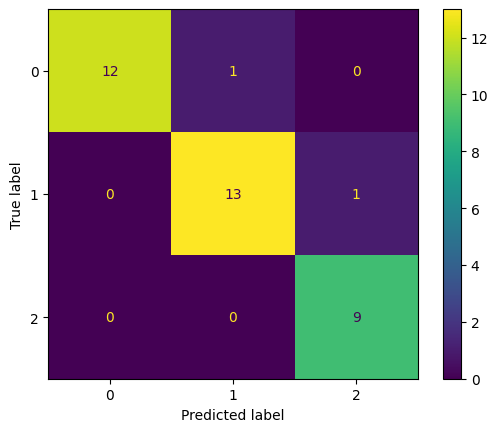

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(prediksi_wine, y_test_wine)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2])
display.plot()

# Pertanyaan!

## MADALINE Breast Cancer

1. Jelaskan bagaimana caranya untuk mengimplementasikan MADALINE yang dapat menerima data multivariable?

Untuk mengimplementasikan MADALINE (Multiple Adaptive Linear Neuron), yang dapat menerima data multivariable, langkah pertama adalah menyiapkan dataset dengan input multivariable yang dinormalisasi. Struktur jaringan terdiri dari lapisan input, lapisan adaptif (ADALINE), dan lapisan output. Setiap neuron di lapisan ADALINE dihitung menggunakan fungsi aktivasi linier. Pelatihan dilakukan dengan algoritma MADALINE Rule II (MR-II), yang memodifikasi bobot secara iteratif untuk meminimalkan kesalahan pada lapisan output. Bobot diperbarui hanya jika perubahan tersebut menurunkan nilai error total. Data multivariable diakomodasi dengan menetapkan jumlah neuron di lapisan input sesuai jumlah fitur, dan hubungan antara lapisan input ke lapisan ADALINE dijembatani melalui bobot yang diinisialisasi secara acak. Validasi dilakukan dengan data terpisah untuk memastikan generalisasi model.

2. Bagaimana caranya untuk mengatur hyperparameternya untuk mencapai akurasi diatas 75%? Jabarkan nilai parameter yang digunakan dan perannya!

Untuk mencapai akurasi di atas 75% dalam pelatihan model Madaline, dapat mengatur hyperparameter dengan memilih nilai optimal berdasarkan eksperimen atau grid search seperti yang dilakukan dalam kode di atas. Berikut adalah penjelasan nilai parameter yang digunakan dan perannya:

- Hidden Neurons: Jumlah neuron tersembunyi (hidden_neuron) memengaruhi kapasitas model untuk menangkap pola dari data. Nilai yang dipilih seperti 5, 10, dan 15 menentukan kompleksitas jaringan. Terlalu sedikit neuron dapat menyebabkan underfitting, sedangkan terlalu banyak dapat menyebabkan overfitting.

- Learning Rate (Alpha): Nilai alpha seperti 0.05, 0.1, dan 0.5 menentukan seberapa besar perubahan bobot dalam setiap iterasi. Nilai yang terlalu besar dapat membuat pelatihan tidak stabil, sedangkan nilai yang terlalu kecil dapat memperlambat konvergensi.

- Maximum Epochs: max_epoch seperti 100, 500, dan 1000 mengontrol jumlah iterasi maksimum untuk pelatihan. Semakin besar nilai epoch, semakin banyak peluang model untuk belajar pola dari data, tetapi risiko overfitting juga meningkat jika pelatihan terlalu lama.

pada acurasi masih terlihat 73% namun pada grid test menunjukkan 97%

## MADALINE Wine

1. Jelaskan mengapa kita menggunakan metode One-vs-Rest untuk klasifikasi multi-kelas?


Metode One-vs-Rest (OvR) digunakan dalam klasifikasi multi-kelas untuk menyederhanakan masalah menjadi serangkaian klasifikasi biner. Setiap kelas diperlakukan secara independen dengan membandingkan satu kelas tertentu (positif) dengan semua kelas lainnya (negatif). Pendekatan ini memungkinkan penggunaan algoritma klasifikasi biner yang sederhana dan efektif, seperti SVM atau Logistic Regression, pada masalah multi-kelas yang kompleks. Selain itu, OvR fleksibel terhadap dataset dengan distribusi yang tidak seimbang dan sering lebih efisien secara komputasi dibanding pendekatan lain seperti One-vs-One. Namun, prediksi akhir ditentukan berdasarkan skor atau probabilitas tertinggi dari setiap model biner.

2. Bagaimana caranya untuk mengatur hyperparameternya untuk mencapai akurasi diatas 90%? Jabarkan nilai hyperparameter yang digunakan dan perannya!

Pada proses di atas telah dilakukan proses tuning secara manual dimana saya memasukkan nilai hyperparameter yang berbeda-beda untuk mendapatkan akurasi yang lebih tinggi. Berikut adalah penjelasan nilai hyperparameter yang digunakan dan perannya:

- Hidden Neurons: Jumlah neuron tersembunyi (hidden_neuron) memengaruhi kapasitas model untuk menangkap pola dari data. Nilai yang dipilih seperti 5, 10, dan 15 menentukan kompleksitas jaringan. Terlalu sedikit neuron dapat menyebabkan underfitting, sedangkan terlalu banyak dapat menyebabkan overfitting.

- Learning Rate (Alpha): Nilai alpha seperti 0.05, 0.1, dan 0.5 menentukan seberapa besar perubahan bobot dalam setiap iterasi. Nilai yang terlalu besar dapat membuat pelatihan tidak stabil, sedangkan nilai yang terlalu kecil dapat memperlambat konvergensi.

- Maximum Epochs: max_epoch seperti 100, 500, dan 1000 mengontrol jumlah iterasi maksimum untuk pelatihan. Semakin besar nilai epoch, semakin banyak peluang model untuk belajar pola dari data, tetapi risiko overfitting juga meningkat jika pelatihan terlalu lama.

- Input Neurons : Jumlah neuron input (input_neuron) menentukan dimensi data masukan. Nilai yang dipilih harus sesuai dengan jumlah fitur pada dataset. Jumlah neuron input yang salah dapat menyebabkan kesalahan dalam representasi data.

Pada data di atas didapatkan akuasi 93%